In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def create_signal(frequency, time):
    sin = np.sin(2 * np.pi * (frequency * time))
    sin2 = np.sin(2 * np.pi * (2 * frequency * time))
    sin4 = np.sin(2 * np.pi * (4 * frequency * time))

    return sin + sin2 + sin4

In [3]:
def plot_signal(signal, time):
    sns.set_style("whitegrid")
    plt.figure(figsize=(15, 10))
    plt.plot(signal, time)
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.show()

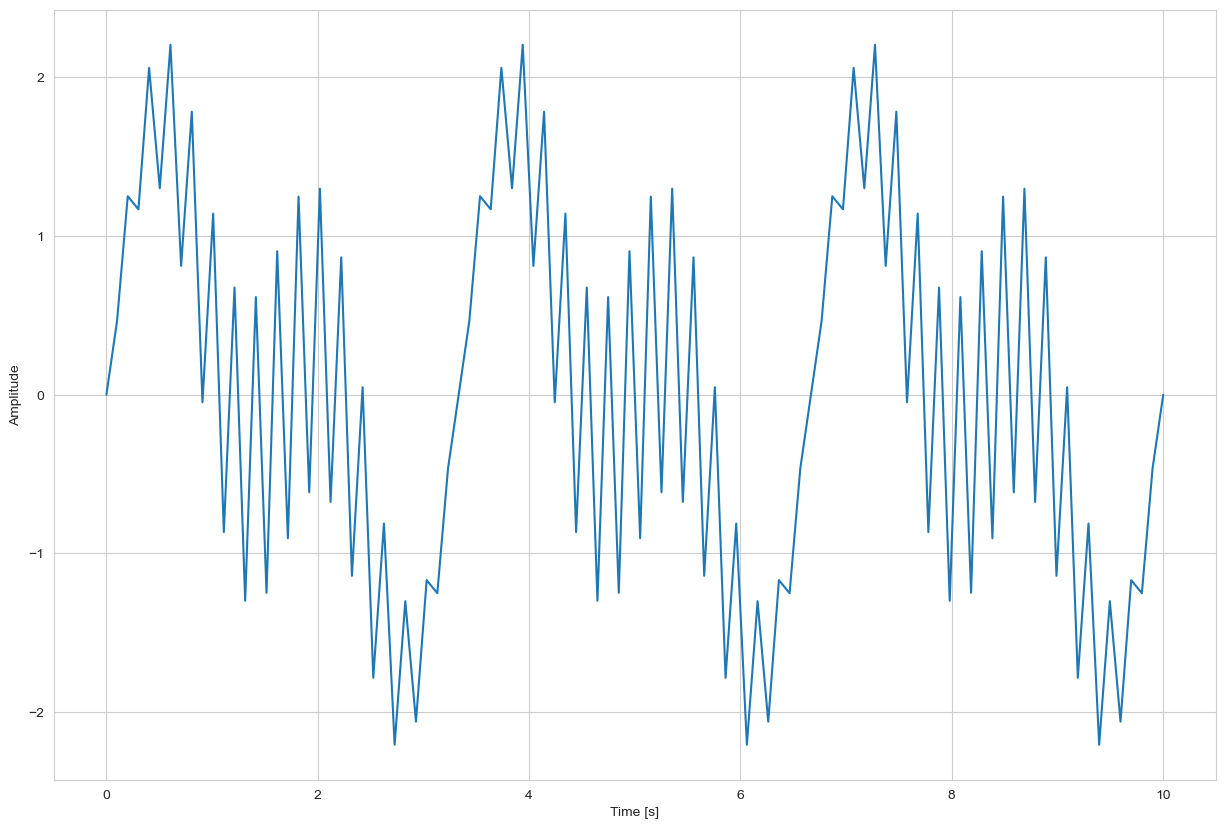

In [4]:
ts = time = np.linspace(0, 10, 100)
s1 = create_signal(15, time = ts)
plot_signal(ts, s1)

In [5]:
def calculate_centre_of_gravity(mult_signal):
    x_centre = np.mean([x.real for x in mult_signal])
    y_centre = np.mean([x.imag for x in mult_signal])
    return x_centre, y_centre

In [6]:
def calculate_sum(mult_signal):
    x_sum = np.sum([x.real for x in mult_signal])
    y_sum = np.sum([x.imag for x in mult_signal])
    return x_sum, y_sum

In [7]:
def create_pure_tone(frequency, time):
    angle = -2 * np.pi * frequency * time
    return np.cos(angle) + 1j * np.sin(angle)

In [8]:
def plot_fourier_transform(pure_tone_frequency, 
                           signal_frequency, 
                           time, 
                           plot_centre_of_gravity=False,
                           plot_sum=False):
    
    # create sinusoid and signal
    pure_tone = create_pure_tone(pure_tone_frequency, time)
    signal = create_signal(signal_frequency, time)
    
    # multiply pure tone and signal
    mult_signal = pure_tone * signal
    
    X = [x.real for x in mult_signal]
    Y = [x.imag for x in mult_signal]

    plt.figure(figsize=(15, 10))
    plt.plot(X, Y, 'o')

    # calculate and plot centre of gravity
    if plot_centre_of_gravity:
        centre_of_gravity = calculate_centre_of_gravity(mult_signal)
        plt.plot([centre_of_gravity[0]], [centre_of_gravity[1]], marker='o', markersize=10, color="red")


    # calculate and plot sum 
    if plot_sum:
        integral = calculate_sum(mult_signal)
        plt.plot([integral[0]], [integral[1]], marker='o', markersize=10, color="green")

    
    # set origin axes
    ax = plt.gca()
    ax.grid(True)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')

    if not plot_sum:
        plt.xlim(-3, 3)
        plt.ylim(-3, 3)

    plt.show()

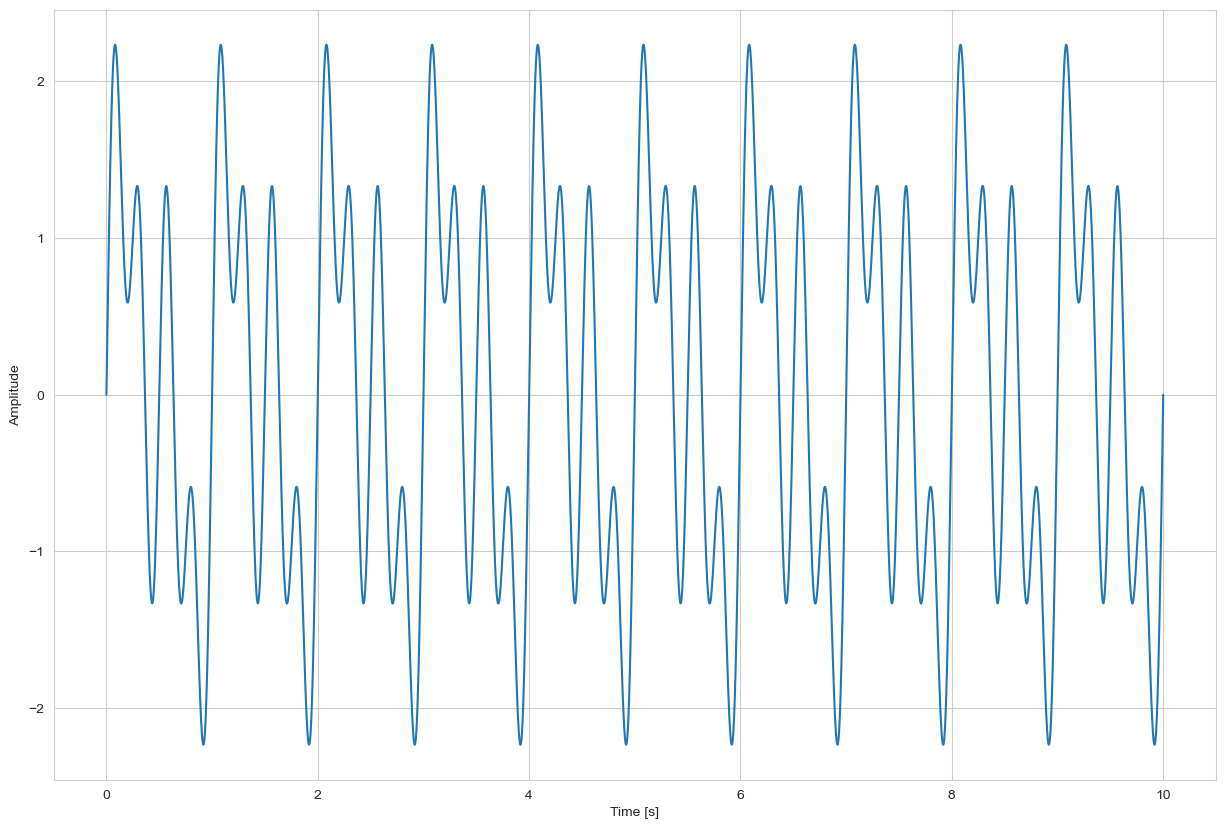

In [9]:
time = np.linspace(0, 10, 10000)
signal = create_signal(frequency=1, time=time)
plot_signal(time, signal)

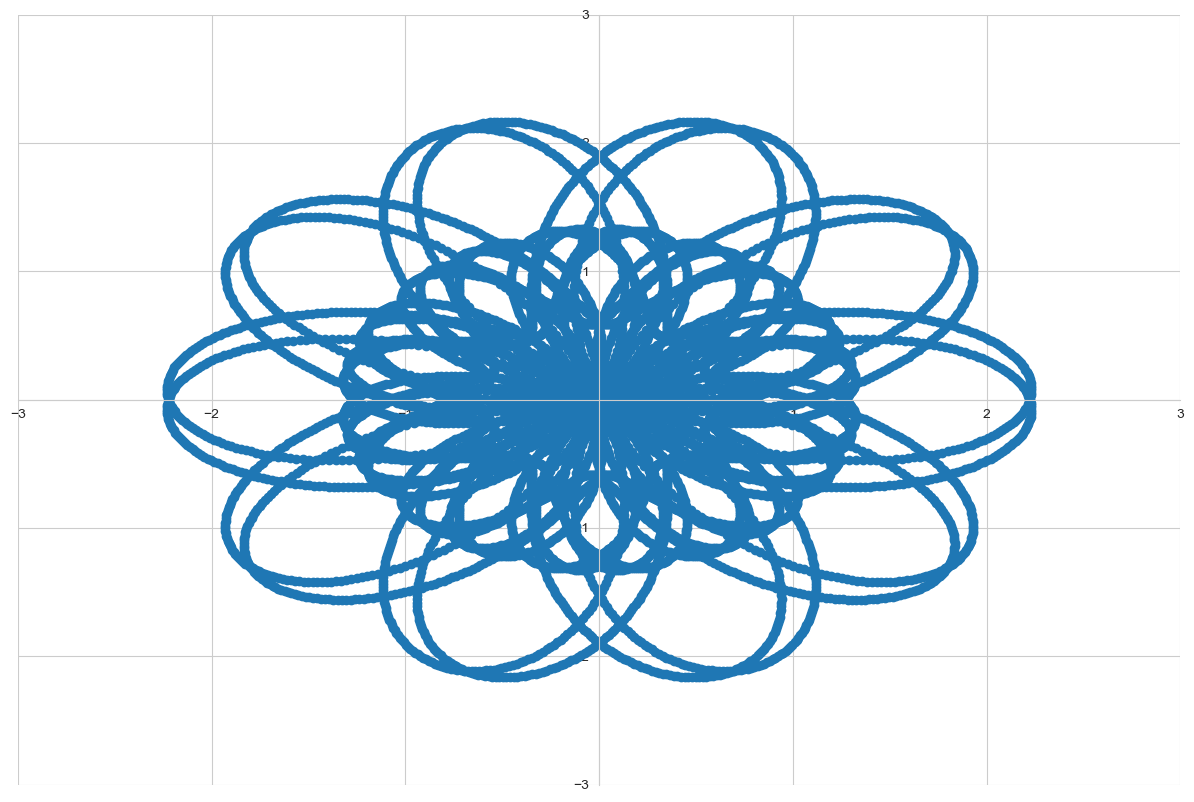

In [18]:
time = np.linspace(0, 10, 10000)
plot_fourier_transform(pure_tone_frequency=1.3,
                       signal_frequency=1,
                       time=time,
                       plot_centre_of_gravity=False,
                       plot_sum=False)